# A2DI - TP6

## Exercice 1 - Régression logistique & convergence

(Question 1)

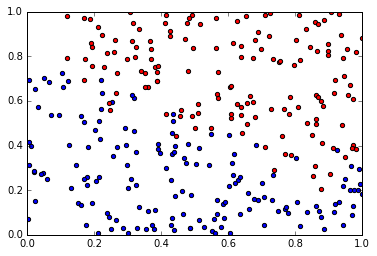

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import queue
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

nb_features = 2

# Génération d'un tableau de 100 points uniformément réparti
def generate_points(nb_points):
    points = [[] for _ in range(nb_features)]
    points_class = []

    for i in range(nb_points):
        ps = []

        for _ in range(nb_features):
            ps.append(np.random.random())

        point_class = 0
        if (-1/2) * ps[0] + 0.75 < ps[1]:
            point_class = 1
            
        # Distance entre le point généré
        # et la droite y = -0.5x + 0.75
        d = np.abs((-0.5*ps[0] - ps[1] + 0.75) / (1 + np.square(0.5)))
        theta = np.exp(-np.square(d) / (2 * np.square(0.05)))
        if np.random.random() < theta/2:
            if point_class == 1:
                point_class = 0
            else:
                point_class = 1
        
        for j in range(nb_features):
            points[j].append(ps[j])

        points_class.append(point_class)

    return points, points_class

# Découpage en 20/80 de l'ensemble
def datagen(n):
    ps, ps_classes = generate_points(n)
    X_train = [[] for _ in range(nb_features)]
    c_train = []
    X_test = [[] for _ in range(nb_features)]
    c_test = []

    limit = int(len(ps_classes) * (20/100))

    for i in range(len(ps_classes)):
        p = []
        for j in range(nb_features):
            p.append(ps[j][i])

        if i > limit-1:
            for j in range(nb_features):
                X_test[j].append(p[j])
            c_test.append(ps_classes[i])
        else:
            for j in range(nb_features):
                X_train[j].append(p[j])
            c_train.append(ps_classes[i])

    return X_train, c_train, X_test, c_test, ps, ps_classes

X_train, c_train, X_test, c_test, points, points_class = datagen(300)

points_x_0 = []
points_y_0 = []
points_x_1 = []
points_y_1 = []

for i in range(len(points_class)):
    if points_class[i] == 0:
        points_x_0.append(points[0][i])
        points_y_0.append(points[1][i])
    else:
        points_x_1.append(points[0][i])
        points_y_1.append(points[1][i])

plt.scatter(points_x_0, points_y_0, s=18, c='blue')
plt.scatter(points_x_1, points_y_1, s=18, c='red')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()

(Question 2)

In [2]:
Xtr_plus = np.insert(np.array(X_train), nb_features, 1, axis=0)
Xte_plus = np.insert(np.array(X_test), nb_features, 1, axis=0)

(Question 3)

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Fonction d'évaluation d'un tableau de X selon un théta
# ATTENTION, on considère le bias déjà ajouté au X
def evals(Xs, theta):
    v = np.dot(theta, Xs)
    v = sigmoid(v)
    return v

# Fonction pour le gradient classique
def classic_grad(samples, classes, lr, iterations):
    thetas = [np.array([np.random.random() for _ in range(len(samples))])]

    while len(thetas) < iterations:
        pred = evals(samples, thetas[-1])
        err = pred - classes
        grad = np.dot(samples, err)
        th = thetas[-1] - (grad * lr)
        thetas.append(th)

    return thetas
    
thetas1 = classic_grad(Xtr_plus, c_train, 0.1, 1000)
thetas2 = classic_grad(Xtr_plus, c_train, 0.02, 1000)

(Question 4)

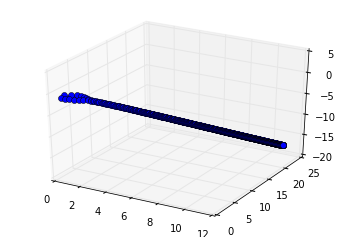

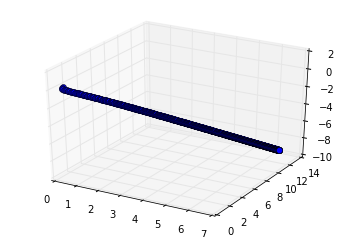

In [4]:
def display_theta(th):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(th[0], th[1] ,th[2], '-o')
    plt.draw()
    
display_theta(np.transpose(thetas1))
display_theta(np.transpose(thetas2))

(Question 5)

In [5]:
# Fonction pour le gradient newton
def newton_grad(samples, classes, lr, iterations):
    thetas = [np.array([np.random.random() for _ in range(len(samples))])]

    while len(thetas) < iterations:
        pred = evals(samples, thetas[-1])
        err = pred - classes
        s = np.multiply(pred, (1 - pred))
        S = np.diag(s)
        H = np.dot(samples, np.dot(S, np.transpose(samples)))
        grad = np.dot(samples, err)
        th = thetas[-1] - (np.dot(np.linalg.inv(H), grad) * lr)
        thetas.append(th)

    return thetas

(Question 6)

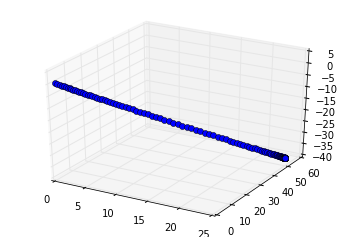

In [6]:
thetas_newton1 = newton_grad(Xtr_plus, c_train, 0.1, 1000)
display_theta(np.transpose(thetas_newton1))

(Question 7)

In [7]:
# Fonction pour le gradient stochastique
def stoc_grad(samples, classes, lr, iterations):
    thetas = [np.array([np.random.random() for _ in range(len(samples))])]
    epochs = 0

    while len(thetas) < iterations:
        s = np.random.get_state()
        samples_ = np.random.permutation(np.transpose(samples))
        np.random.set_state(s)
        classes_ = np.random.permutation(classes)
        epochs+=1

        for sa, cl in zip(samples_, classes_):
            pred = evals(sa, thetas[-1])
            err = pred - cl
            grad = np.dot(sa, err)
            th = thetas[-1] - (grad * lr)
            thetas.append(th)

    return thetas, epochs

(Question 8)

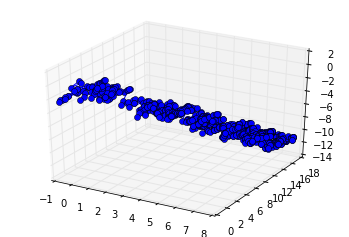

In [12]:
thetas_stoc1, epochs = stoc_grad(Xtr_plus, c_train, 1.5, 1000)
display_theta(np.transpose(thetas_stoc1))

(Question 9)

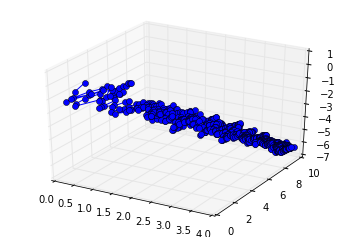

In [13]:
# Fonction pour le gradient stochastique
def stoc_grad_lr(samples, classes, iterations):
    thetas = [np.array([np.random.random() for _ in range(len(samples))])]
    epochs = 0

    while len(thetas) < iterations:
        s = np.random.get_state()
        samples_ = np.random.permutation(np.transpose(samples))
        np.random.set_state(s)
        classes_ = np.random.permutation(classes)
        epochs+=1
        i = 0

        for sa, cl in zip(samples_, classes_):
            t = epochs * (len(classes_) + i)
            lr = 20 / np.power(t + 100, 0.6)

            pred = evals(sa, thetas[-1])
            err = pred - cl
            grad = np.dot(sa, err)
            th = thetas[-1] - (grad * lr)
            thetas.append(th)
            i += 1

    return thetas, epochs

thetas_stoc_lr1, epochs = stoc_grad_lr(Xtr_plus, c_train, 1000)
display_theta(np.transpose(thetas_stoc_lr1))

(Question 10)

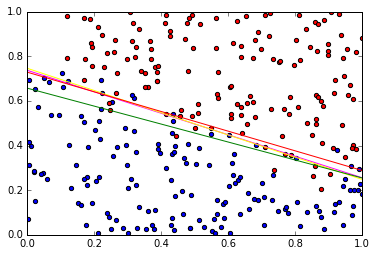

In [14]:
def show_line(th, color):
    arr = np.array([i/1000 for i in range(0, 1000)])
    formula = lambda x : -((th[-1][0] * x + th[-1][2])/th[-1][1])
    plt.plot(arr, formula(arr), c=color)

plt.scatter(points_x_0, points_y_0, s=18, c='blue')
plt.scatter(points_x_1, points_y_1, s=18, c='red')

show_line(thetas1, "magenta")
show_line(thetas_newton1, "yellow")
show_line(thetas_stoc1, "red")
show_line(thetas_stoc_lr1, "green")

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()